<a href="https://colab.research.google.com/github/Srivardini/Artificial_star/blob/main/Five_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.9/873.9 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1


In [2]:
import os
import sys

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.nddata import CCDData
 
from photutils.datasets import make_gaussian_sources_image

#Five_Stars

In [49]:
from photutils.datasets import make_random_gaussians_table, make_gaussian_sources_image

#Table:
shape = (500,500)
n_sources = 5
param_ranges = {'amplitude': [100, 1000],
                    'x_mean': [50, 450],
                    'y_mean': [50, 450],
                    'x_stddev': [4, 4],
                    'y_stddev': [4, 4],
                    'theta': [0, np.pi]} 
sources = make_random_gaussians_table(n_sources, param_ranges, seed =12345)

#make_image:

stars_image = make_gaussian_sources_image(shape, sources)

In [70]:
print(stars_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
print(sources)

    amplitude            x_mean       ... y_stddev        theta       
------------------ ------------------ ... -------- -------------------
 304.6024202204527 183.12557114655382 ...      4.0   2.562837155971277
385.08250573877757 289.32350143487594 ...      4.0  0.6072522333720015
 817.6289115994607 124.69367424148534 ...      4.0  0.4067390985853497
 708.6292036758771 319.10241760584853 ...      4.0 0.28797331004670434
 451.9985955417181 426.72114610797485 ...      4.0  1.8804568744035262


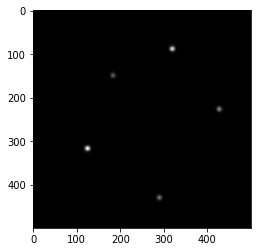

In [51]:
plt.imshow(stars_image, interpolation = 'nearest', cmap = 'gray')

#Stars_Detection

In [52]:
from photutils.detection import DAOStarFinder

In [53]:
from astropy.stats import sigma_clipped_stats


In [55]:
mean, median, std = sigma_clipped_stats(stars_image, sigma=3.0)  


In [56]:
print((mean,median,std))

(9.037163570989198e-06, 1.2623409916676425e-114, 0.00014035932344776692)


In [57]:
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources_stars = daofind(stars_image - median)  

In [58]:
print(sources_stars)

 id     xcentroid      ...        flux               mag        
--- ------------------ ... ----------------- -------------------
  1  319.1077089013898 ... 139683.7092490895 -12.862864397608755
  2 183.13210058749738 ...  60168.9654441602 -11.948431360549186
  3 426.70554803703214 ... 89053.91652979588 -12.374132560477246
  4 124.67622516126194 ...  161507.324474721 -13.020480556711506
  5  289.3421526250417 ... 75150.24018806573  -12.18982593243988


In [59]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

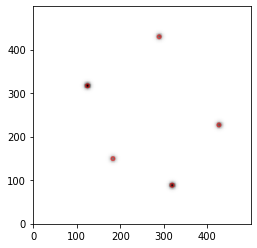

In [66]:
positions = np.transpose((sources_stars['xcentroid'], sources_stars['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(stars_image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5)

#Aperture_Photometry

In [118]:
from photutils.aperture import aperture_photometry

photo_table = aperture_photometry(stars_image, apertures)
print(photo_table)

 id      xcenter            ycenter          aperture_sum   
           pix                pix                           
--- ------------------ ------------------ ------------------
  1  319.1077089013898  88.38044252932129 27916.775732809485
  2 183.13210058749738 149.31518434357142 11997.559326797633
  3 426.70554803703214 226.72122636422128 17808.588963430095
  4 124.67622516126194  316.8895519742775  32204.31233212069
  5  289.3421526250417 429.52390407604577 15185.387185555093
